In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import  MiniBatchKMeans
import numpy as np
import pandas as pd


In [10]:
data=pd.read_csv('dataset_candidatura_wr/odometry_dual.txt')
data=data.iloc[:,:-1]
cols=['x_w','y_w','th_w','x_1','y_1','th_1','hmm_1','hmm_2','real_cuant','x','y','th']
data.columns=cols
data['error_w']=np.linalg.norm(data[['x_w','y_w']].values-data[['x','y']].values ,axis=1)
data['error_th_w']=np.linalg.norm(data[['th_w']].values-data[['th']].values ,axis=1)
data['error_dual']=np.linalg.norm(data[['x_1','y_1']].values-data[['x','y']].values ,axis=1)
data['error_th_dual']=np.linalg.norm(data[['th_1']].values-data[['th']].values ,axis=1)


data

,x_w,y_w,th_w,x_1,y_1,th_1,hmm_1,hmm_2,real_cuant,x,y,th,error_w,error_th_w,error_dual,error_th_dual
0,-0.000806,0.002632,0.023900,0.007259,0.109879,0.023786,15.0,15.0,15.0,0.000350,0.002666,0.023777,0.001156,0.000123,0.107435,0.000008
1,-0.000692,0.002639,0.024065,0.007373,0.109887,0.023951,15.0,15.0,15.0,0.000352,0.002674,0.023821,0.001044,0.000244,0.107442,0.000129
2,-0.000806,0.002643,0.023999,0.007259,0.109890,0.023885,15.0,15.0,15.0,0.000356,0.002683,0.023867,0.001163,0.000132,0.107429,0.000018
3,-0.000692,0.002648,0.024142,0.007373,0.109895,0.024027,15.0,15.0,15.0,0.000358,0.002690,0.023912,0.001051,0.000230,0.107434,0.000115
4,-0.000692,0.002656,0.024219,0.007373,0.109904,0.024105,15.0,15.0,15.0,0.000360,0.002687,0.023964,0.001053,0.000255,0.107446,0.000141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,0.903464,2.819979,-0.987040,3.000262,2.527358,-1.947109,7.0,7.0,20.0,2.413841,1.796826,-1.894479,1.824303,0.907439,0.936786,0.052631
1462,0.911953,2.809861,-0.999292,3.013462,2.527804,-1.959361,7.0,7.0,20.0,2.411303,1.784942,-1.905798,1.816180,0.906507,0.956263,0.053563
1463,0.920938,2.798833,-1.012456,3.027684,2.528054,-1.972526,7.0,7.0,20.0,2.408627,1.773084,-1.917154,1.807036,0.904698,0.976326,0.055372
1464,0.924746,2.794069,-1.018124,3.033782,2.528139,-1.978194,7.0,7.0,20.0,2.405812,1.761249,-1.928506,1.805623,0.910382,0.991194,0.049688


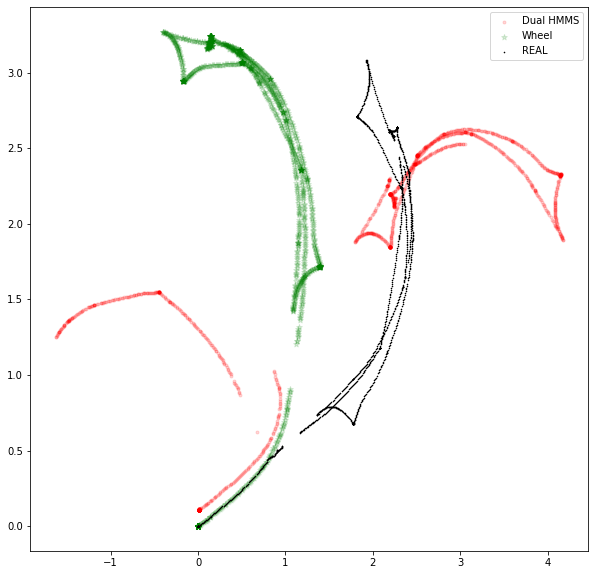

In [11]:
start=500
#data_s=data.iloc[start:start+400]
data_s=data
fig = plt.figure(figsize=(10,10))


ax1 = fig.add_subplot(111)
ax1.scatter(x= data_s.x_1, y=data_s.y_1,marker='.',c='red',alpha=.15,label= 'Dual HMMS')
ax1.scatter(x= data_s.x_w, y=data_s.y_w,marker='*',c='green',alpha=.15,label= 'Wheel')
ax1.scatter(x= data_s.x, y=data_s.y,marker='*',s=.5,c='black',label= "REAL")
plt.legend()



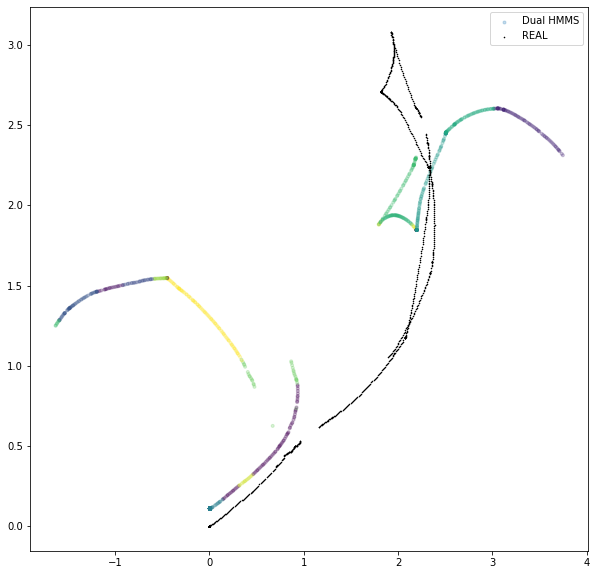

In [12]:
#data_s=data.iloc[start:start+400]
data_s=data[:-500]
fig = plt.figure(figsize=(10,10))


ax1 = fig.add_subplot(111)
ax1.scatter(x= data_s.x_1, y=data_s.y_1,marker='.',c=data_s.hmm_1,alpha=.25,label= 'Dual HMMS')
#ax1.scatter(x= data_s.x_w, y=data_s.y_w,marker='*',c='green',alpha=.15,label= 'Wheel')
ax1.scatter(x= data_s.x, y=data_s.y,marker='*',s=.5,c='black',label= "REAL")
plt.legend()



/home/oscar/py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


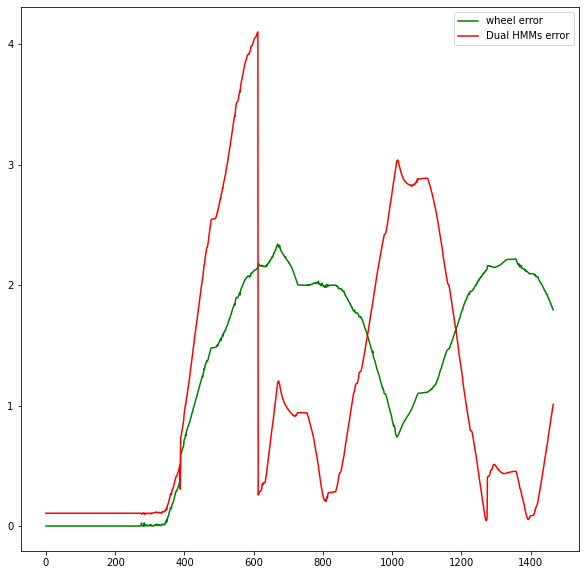

In [13]:

fig = plt.figure(figsize=(10,10))
plt.plot(data.error_w,c='green',label='wheel error')
plt.plot(data.error_dual,c='red',label='Dual HMMs error')


ax1 = fig.add_subplot(111)
ax1.legend()

/home/oscar/py3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


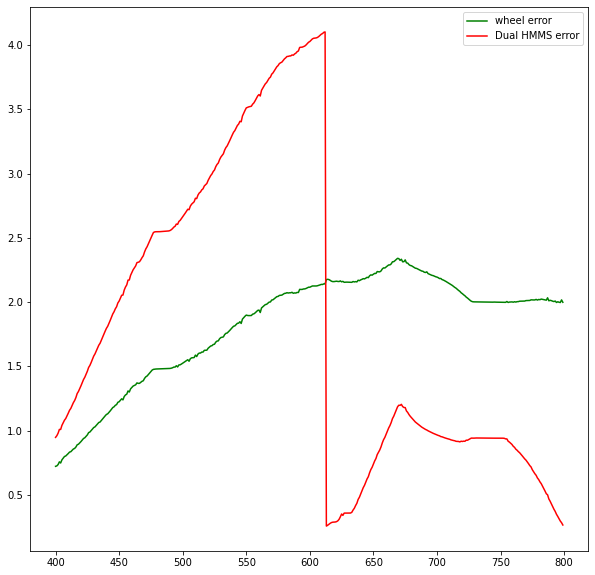

In [14]:
start=400
fig = plt.figure(figsize=(10,10))
plt.plot(data.error_w[start:start+400],c='green',label='wheel error')
plt.plot(data.error_dual[start:start+400],c='red',label='Dual HMMS error')


ax1 = fig.add_subplot(111)
ax1.legend()

/home/oscar/py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


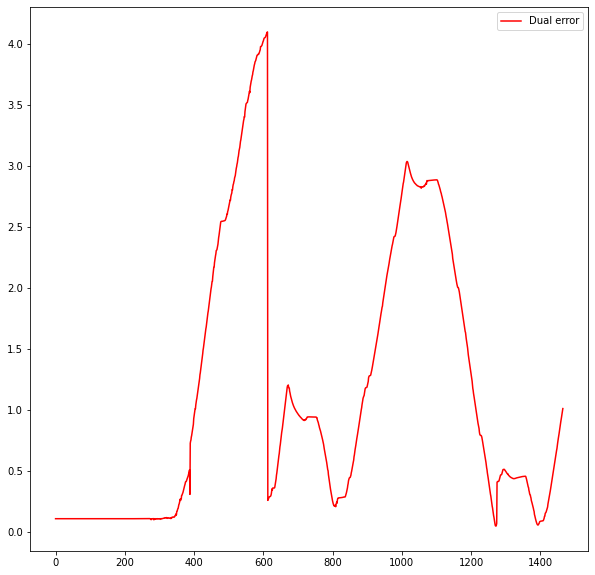

In [15]:
fig = plt.figure(figsize=(10,10))
#plt.plot(data.error_w,c='green',label='wheel error')
plt.plot(data.error_dual,c='red',label='Dual error')


ax1 = fig.add_subplot(111)
ax1.legend()

/home/oscar/py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


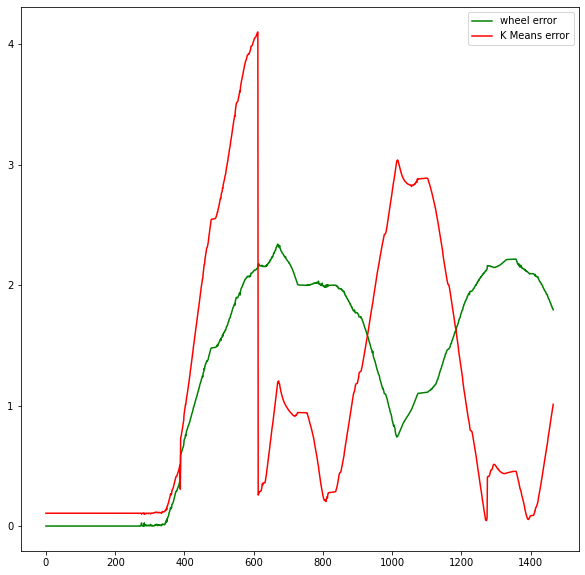

In [16]:
fig = plt.figure(figsize=(10,10))
plt.plot(data.error_w,c='green',label='wheel error')
plt.plot(data.error_dual,c='red',label='K Means error')


ax1 = fig.add_subplot(111)
ax1.legend()